In [24]:
import cv2
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd

In [25]:
# Paths of nonShopLifting & shopLifting
non_shopLifting_path = "/kaggle/input/shop-dataset/Shop DataSet/non shop lifters"
shopLifting_path = "/kaggle/input/shop-dataset/Shop DataSet/shop lifters"

In [26]:
# Count the number of cases for each class
non_shopLifting= os.listdir("/kaggle/input/shop-dataset/Shop DataSet/non shop lifters")
shopLifting = os.listdir("/kaggle/input/shop-dataset/Shop DataSet/shop lifters")


In [27]:
# Non_shopLifting & shopLifting videos
base_path = "/kaggle/input/shop-dataset/Shop DataSet"
nonShopLifting_videosPaths = [os.path.join(base_path, "non shop lifters", subPath) for subPath in non_shopLifting]
shopLifting_videosPaths = [os.path.join(base_path, "shop lifters",  subPath) for subPath in shopLifting]

In [28]:
print("THe number of Shop Lifting Videos = ", len(shopLifting_videosPaths))
print("THe number of Non-Shop Lifting Videos = ", len(nonShopLifting_videosPaths))

THe number of Shop Lifting Videos =  324
THe number of Non-Shop Lifting Videos =  531


In [29]:
# get number of frames for each video
def getVideoInfo(videos_paths, video_property):
    framesInfo = []
    for video_path in videos_paths:
        cap = cv2.VideoCapture(video_path)
        framesInfoPerVideo = round(cap.get(video_property))
        framesInfo.append(framesInfoPerVideo)
    return framesInfo    

In [30]:
# number of frames of each video
nonShopLiftingFrames = getVideoInfo(nonShopLifting_videosPaths, cv2.CAP_PROP_FRAME_COUNT)
shopLiftingFrames = getVideoInfo(shopLifting_videosPaths, cv2.CAP_PROP_FRAME_COUNT)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


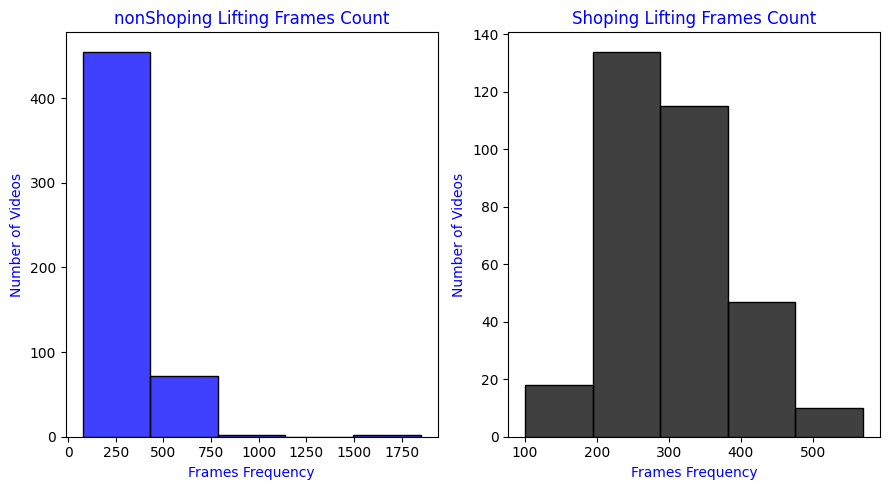

In [31]:
# Plotting Frames Frequency of Each Video
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,5))

sns.histplot(nonShopLiftingFrames, color = "blue", ax = axes[0], bins = 5)
axes[0].set_title("nonShoping Lifting Frames Count", color = "blue")
axes[0].set_ylabel("Number of Videos", color = "blue")
axes[0].set_xlabel("Frames Frequency", color = "blue")

sns.histplot(shopLiftingFrames, color = "black", ax = axes[1], bins = 5)
axes[1].set_title("Shoping Lifting Frames Count", color = "blue")
axes[1].set_ylabel("Number of Videos", color = "blue")
axes[1].set_xlabel("Frames Frequency", color = "blue")
plt.tight_layout()

In [32]:
# Get the frames per second for each video
nonShopLiftingFPS = getVideoInfo(nonShopLifting_videosPaths, cv2.CAP_PROP_FPS)
shopLiftingFPS = getVideoInfo(shopLifting_videosPaths, cv2.CAP_PROP_FPS)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


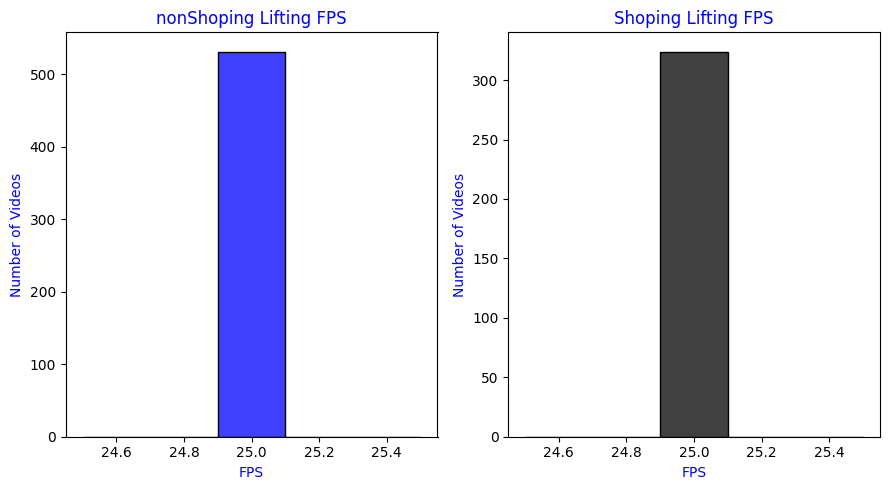

In [33]:
# Plotting frames per second for each video
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,5))

sns.histplot(nonShopLiftingFPS, color = "blue", ax = axes[0], bins = 5)
axes[0].set_title("nonShoping Lifting FPS", color = "blue")
axes[0].set_ylabel("Number of Videos", color = "blue")
axes[0].set_xlabel("FPS", color = "blue")

sns.histplot(shopLiftingFPS, color = "black", ax = axes[1], bins = 5)
axes[1].set_title("Shoping Lifting FPS", color = "blue")
axes[1].set_ylabel("Number of Videos", color = "blue")
axes[1].set_xlabel("FPS", color = "blue")
plt.tight_layout()

In [34]:
video_path = nonShopLifting_videosPaths[0]
ipd.Video(video_path,  width = 500, height = 300)

In [35]:
# Get the frames per second for each video
nonLiftingHeight = list(set(getVideoInfo(nonShopLifting_videosPaths, cv2.CAP_PROP_FRAME_HEIGHT)))
shopLiftingHight= list(set(getVideoInfo(shopLifting_videosPaths, cv2.CAP_PROP_FRAME_HEIGHT)))
nonLiftingWidth =  list(set(getVideoInfo(nonShopLifting_videosPaths, cv2.CAP_PROP_FRAME_WIDTH)))
shopLiftingWidth =  list(set(getVideoInfo(shopLifting_videosPaths, cv2.CAP_PROP_FRAME_WIDTH)))

In [36]:
print("The Frame Shape of NonLifting is ", "(", *nonLiftingWidth , ", ", *nonLiftingHeight, ")" )
print("The Frame Shape of NonLifting is ", "(", *shopLiftingWidth , ", ", *shopLiftingHight, ")" )

The Frame Shape of NonLifting is  ( 704 ,  576 )
The Frame Shape of NonLifting is  ( 704 ,  576 )


Total frames: 350


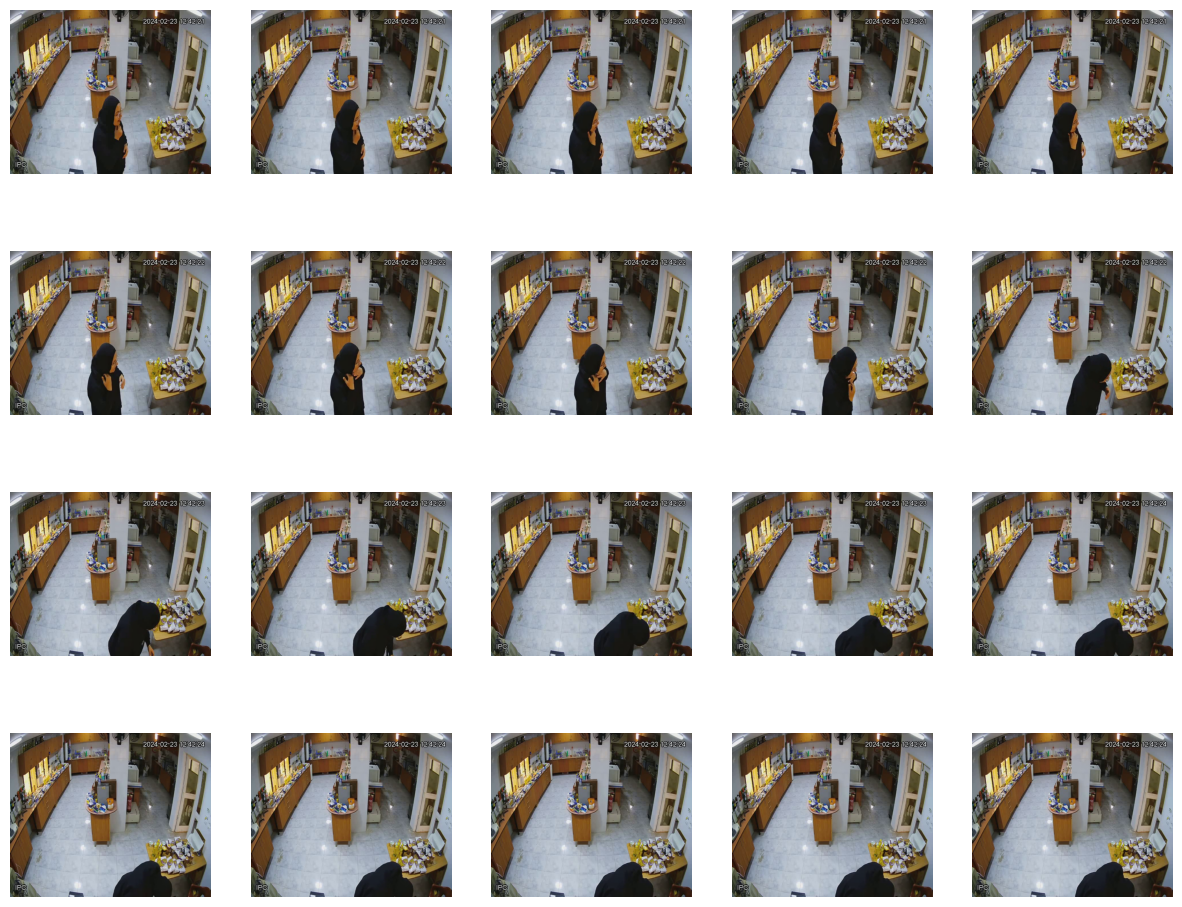

In [37]:
import cv2
import matplotlib.pyplot as plt

def show_video_frames_matplotlib(video_path, num_frames=20, skip_frames=10):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if the video opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    frame_count = 0
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    print(f"Total frames: {total_frames}")

    # Create a list to store frames
    frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        # Capture every `skip_frames` frames until we get `num_frames`
        if frame_count % skip_frames == 0 and len(frames) < num_frames:
            # Convert BGR to RGB
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(rgb_frame)
        
        frame_count += 1

    cap.release()

    # Display the frames using Matplotlib
    plt.figure(figsize=(15, 12))
    for i, frame in enumerate(frames):
        plt.subplot(4, 5, i + 1)  # 4 rows and 5 columns
        plt.imshow(frame)
        plt.axis('off')  # Hide axes
    plt.show()

# Example usage
video_path = nonShopLifting_videosPaths[0]  
show_video_frames_matplotlib(video_path, num_frames=20, skip_frames=5)  # Show 20 frames


In [38]:
import shutil

# Specify the path of the folder to zip
folder_path = '/kaggle/working/representative_frames'

# Create a zip archive of the folder
shutil.make_archive('representative_frames_shopLifting_260_rest', 'zip', folder_path)


'/kaggle/working/representative_frames_shopLifting_260_rest.zip'

In [39]:
from IPython.display import FileLink

# Create a downloadable link for the zip file
FileLink('representative_frames_shopLifting_260_rest.zip')


/kaggle/working/representative_frames_shopLifting_260_rest.zip

In [6]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Step 1: Load the MobileNet pre-trained model
# MobileNet is pre-trained on ImageNet, so it already has learned features useful for many image classification tasks.
base_model = MobileNet(weights='imagenet')

# Step 2: Modify the model to fit the shoplifting detection task
# We're extracting features from MobileNet, but it seems you're trying to load a custom layer from a saved model.
# Instead of directly referencing a layer by a path, we should try loading the weights separately if needed.

# If your custom model is saved as a file, you can load the weights from the saved file.
# Example: If your model weights are stored in a .h5 file in a Kaggle dataset, you can do the following:

# Path to your custom model file (adjust if necessary)
model_path = '/kaggle/input/shoplifters_model/tensorflow2/default/1/3dccn(1)_model.h5'

# Load the MobileNet model up to a specific layer
# You should specify the correct layer name instead of a directory path. 
# For now, let's load the base MobileNet and replace its top layer with custom weights (if needed).
try:
    # Load pre-trained MobileNet without the last few layers (include_top=False excludes the top layers)
    model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    
    # Load your custom model weights if they are in a file (assuming it's saved as a .h5 file)
    model.load_weights(model_path)

    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

# Step 3: You can now use this model for feature extraction or add custom layers on top
# This part depends on what task you're performing next (e.g., classification, detection).


Error loading model: Layer count mismatch when loading weights from file. Model expected 54 layers, found 6 saved layers.


In [ ]:
from sklearn.cluster import KMeans
   
# Function to extract features from a single frame
def extract_features(frame):
    img = cv2.resize(frame, (224, 224))  # Resize frame for VGG16
    img_data = image.img_to_array(img)   # Convert to array
    img_data = np.expand_dims(img_data, axis=0)  # Add batch dimension
    img_data = preprocess_input(img_data)  # Preprocess for VGG16
    features = model.predict(img_data)  # Get features from the 'fc1' layer
    return features.flatten()  # Flatten the feature vector

# Step 2: Extract frames from the video
def extract_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    return frames

# Step 3: Apply KMeans++ Clustering on frame features
def cluster_frames(frames, num_clusters=5):
    # Extract features for all frames
    features = np.array([extract_features(frame) for frame in frames])

    # Check if features array is empty
    if features.size == 0:
        raise ValueError("Features array is empty. Check frame extraction and feature extraction steps.")

    # Apply KMeans++ Clustering on the feature vectors
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans.fit(features)

    # Find representative frames for each cluster
    representative_frames = []
    for cluster_idx in range(num_clusters):
        # Get all frames in the current cluster
        cluster_members = np.where(kmeans.labels_ == cluster_idx)[0]

        # Select the first frame as the representative (or you can choose the closest to the centroid)
        representative_frame_idx = cluster_members[0]
        representative_frames.append((representative_frame_idx, frames[representative_frame_idx]))

    # Sort by the original order of frames
    representative_frames.sort(key=lambda x: x[0])
    return [frame for _, frame in representative_frames]

# Step 4: Save representative frames to disk
def save_representative_frames(video_path, representative_frames, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    video_name = os.path.basename(video_path)
    video_folder = os.path.join(output_folder, video_name)
    os.makedirs(video_folder, exist_ok=True)
    
    for idx, frame in enumerate(representative_frames):
        frame_path = os.path.join(video_folder, f"frame_{idx}.jpg")
        cv2.imwrite(frame_path, frame)

# Step 5: Main processing function
def process_video(video_path, num_clusters, output_folder):
    frames = extract_frames(video_path)
    representative_frames = cluster_frames(frames, num_clusters)
    save_representative_frames(video_path, representative_frames, output_folder)
    return [os.path.join(output_folder, os.path.basename(video_path), f"frame_{idx}.jpg") for idx in range(len(representative_frames))]

# Main execution
num_clusters = 15
output_folder = "representative_frames"
framesPerVideo = {}

# Example video paths (Assuming nonShopLifting_videosPaths and shopLifting_videosPaths are defined)
video_paths = shopLifting_videosPaths 
# Sequential processing of videos
indx = 1
for video_path in video_paths[251 :]:
    print(video_path)
    framesPerVideo[video_path] = process_video(video_path, num_clusters, output_folder)
    print(f"================================== video {indx} finished ======================")
    indx += 1



In [ ]:
# -------------------------------------------------
# 4. Define Paths and Parameters
# -------------------------------------------------
base_folder_path = "/kaggle/input/shop-dataset/Shop DataSet"
resized_shape = (224, 224)  # Reduced frame size to (224, 224)
batch_size = 8  
num_frames = 15  
outputFilePath = "/kaggle/working/" 
#framesFoldersPaths = os.listdir('/kaggle/input/representativeframes')
#framesFoldersPaths.remove('representative_frames_nonShopLifting300') # removed it is duplicated


In [ ]:
with h5py.File(outputFilePath, 'w') as h5file:
    for framesFolderPath in framesFoldersPaths:
        fullFoldersPath = os.path.join(baseFolderPath, framesFolderPath)
        videosPaths = os.listdir(fullFoldersPath)

        for videoPath in videosPaths:
            videoFolderPath = os.path.join(fullFoldersPath, videoPath)
            framesPaths = sorted(os.listdir(videoFolderPath))  # Sorted to maintain frame order
            video_frames = []  # List to hold the frames for one video

            for framePath in framesPaths:
                frameFullPath = os.path.join(videoFolderPath, framePath)

                # Read the frame
                frame = cv2.imread(frameFullPath)

                if frame is not None:
                    # Resize the frame
                    resized_frame = cv2.resize(frame, resized_frame_shape)

                    # Normalize the frame
                    normalized_frame = resized_frame / 255.0

                    # Append frame to video_frames list
                    video_frames.append(normalized_frame)

            # Stack frames along the first axis (number of frames) for the current video
            video_frames_array = np.stack(video_frames)

            # Save the video frames to the HDF5 file with compression
            h5file.create_dataset(f'{framesFolderPath}/{videoPath}', data=video_frames_array, compression="gzip", compression_opts=9)

            # Clear memory for the next video
            del video_frames, video_frames_array


In [ ]:
# -------------------------------------------------
# 1. Import Necessary Libraries
# -------------------------------------------------
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, TimeDistributed, Conv2D, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# -------------------------------------------------
# 2. GPU Configuration: Enable Memory Growth
# -------------------------------------------------
import tensorflow as tf

# Enable memory growth for GPUs to prevent TensorFlow from allocating all memory at once
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Enable memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Enabled memory growth for {len(gpus)} GPU(s).")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(f"Error enabling memory growth: {e}")
else:
    print("No GPUs found. Using CPU.")


# -------------------------------------------------
# 3. Data Generator: FrameDataGenerator Class
# -------------------------------------------------
class FrameDataGenerator(Sequence):
    def __init__(self, video_paths, labels, resized_shape, batch_size, num_frames=10, shuffle=True):
        """
        Initializes the data generator.

        Parameters:
        - video_paths (list): List of video directory paths.
        - labels (list): Corresponding list of labels.
        - resized_shape (tuple): Desired frame size (width, height).
        - batch_size (int): Number of samples per batch.
        - num_frames (int): Number of frames per video to process.
        - shuffle (bool): Whether to shuffle data after each epoch.
        """
        self.video_paths = video_paths
        self.labels = labels
        self.resized_shape = resized_shape
        self.batch_size = batch_size
        self.num_frames = num_frames
        self.shuffle = shuffle
        self.indices = np.arange(len(self.video_paths))
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __len__(self):
        """
        Returns the number of batches per epoch.
        """
        return len(self.video_paths) // self.batch_size

    def __getitem__(self, index):
        """
        Generates one batch of data.

        Returns:
        - batch_frames_array (np.ndarray): Array of shape (batch_size, num_frames, height, width, channels).
        - batch_labels_array (np.ndarray): Array of shape (batch_size,).
        """
        # Get batch indices
        batch_indices = self.indices[index * self.batch_size : (index + 1) * self.batch_size]
        batch_video_paths = [self.video_paths[i] for i in batch_indices]
        batch_labels = [self.labels[i] for i in batch_indices]
        batch_frames = []

        for video_path in batch_video_paths:
            frames_paths = sorted(os.listdir(video_path))  # Maintain frame order
            video_frames = []

            for frame_path in frames_paths:
                frame_full_path = os.path.join(video_path, frame_path)
                frame = cv2.imread(frame_full_path)

                if frame is not None:
                    try:
                        # Resize the frame
                        resized_frame = cv2.resize(frame, self.resized_shape)

                        # Normalize the frame and cast to float32
                        normalized_frame = resized_frame / 255.0
                        video_frames.append(normalized_frame.astype(np.float32))
                    except Exception as e:
                        print(f"Error processing frame {frame_full_path}: {e}")

            # Ensure a fixed number of frames per video
            if len(video_frames) < self.num_frames:
                # Pad with the last frame or zeros if insufficient frames
                if video_frames:
                    last_frame = video_frames[-1]
                else:
                    last_frame = np.zeros((*self.resized_shape, 3), dtype=np.float32)
                video_frames += [last_frame] * (self.num_frames - len(video_frames))
            else:
                # Truncate to the desired number of frames
                video_frames = video_frames[:self.num_frames]

            batch_frames.append(np.stack(video_frames))

        # Convert lists to NumPy arrays
        batch_frames_array = np.array(batch_frames)  # Shape: (batch_size, num_frames, height, width, channels)
        batch_labels_array = np.array(batch_labels).astype(np.float32)  # Shape: (batch_size,)

        return batch_frames_array, batch_labels_array

    def on_epoch_end(self):
        """
        Shuffles the data at the end of each epoch.
        """
        if self.shuffle:
            np.random.shuffle(self.indices)


# -------------------------------------------------
# 5. Prepare Data: List all video_paths and labels
# -------------------------------------------------

video_paths = []
labels = []

for frames_folder_path in framesFoldersPaths:
    full_folder_path = os.path.join(base_folder_path, frames_folder_path)
    video_dirs = sorted(os.listdir(full_folder_path))

    for video_dir in video_dirs:
        video_full_path = os.path.join(full_folder_path, video_dir)
        if os.path.isdir(video_full_path):
            video_paths.append(video_full_path)

            # Assign label based on folder name suffix
            if frames_folder_path.endswith(('100', '200', '400', '500')):
                label = 0  # Label 0 for specific suffixes
            else:
                label = 1  # Label 1 for other cases
            labels.append(label)






In [ ]:
# -------------------------------------------------
# 6. Split Data into Training and Validation Sets
# -------------------------------------------------
train_x, val_x, train_y, val_y = train_test_split(
    video_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

# -------------------------------------------------
# 7. Create Data Generators
# -------------------------------------------------
train_generator = FrameDataGenerator(
    video_paths=train_x,
    labels=train_y,
    resized_shape=resized_shape,
    batch_size=batch_size,
    num_frames=num_frames,
    shuffle=True
)

val_generator = FrameDataGenerator(
    video_paths=val_x,
    labels=val_y,
    resized_shape=resized_shape,
    batch_size=batch_size,
    num_frames=num_frames,
    shuffle=False  # Typically, validation data is not shuffled
)

In [ ]:
# -------------------------------------------------
# 8. Calculate Class Weights
# -------------------------------------------------
# Calculate class weights using only training labels to avoid data leakage
class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(train_y), 
    y=train_y
)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Class Weight Dictionary:", class_weight_dict)



In [ ]:
# -------------------------------------------------
# 11. Define Callbacks
# -------------------------------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)  # Changed to .keras
]

In [ ]:
# -------------------------------------------------
# 9. Model Definition
# -------------------------------------------------
from keras.layers import Input, TimeDistributed, Conv2D, ConvLSTM2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

def create_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))

    # Reduced number of filters
    model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same')))

    # Reduced number of units in ConvLSTM2D
    model.add(ConvLSTM2D(16, (3, 3), activation='relu', return_sequences=True, padding='same'))
    model.add(ConvLSTM2D(32, (3, 3), activation='relu', return_sequences=False, padding='same'))

    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid', dtype='float32'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# -------------------------------------------------
# 10. Create and Summarize the Model
# -------------------------------------------------
input_shape = (num_frames, resized_shape[0], resized_shape[1], 3)  # (15, 224, 224, 3)
model = create_model(input_shape)

# Display model architecture and parameters
model.summary()


# -------------------------------------------------
# 12. Train the Model
# -------------------------------------------------
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1  # Removed workers and use_multiprocessing to fix the TypeError
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout

def create_3d_cnn(input_shape):
    """
    Creates and compiles a 3D CNN model.

    Parameters:
    - input_shape (tuple): Shape of the input data (num_frames, height, width, channels).

    Returns:
    - model (Sequential): Compiled Keras model.
    """
    model = Sequential()
    
    # First 3D Conv Layer
    model.add(Conv3D(32, (3, 3, 3), activation='relu', padding='same'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    # Second 3D Conv Layer
    model.add(Conv3D(64, (3, 3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    # Third 3D Conv Layer
    model.add(Conv3D(128, (3, 3, 3), activation='relu', padding='same', input_shape=input_shape, kernel_regularizer=l2(0.01)))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    # Flatten the output before the Dense layers
    model.add(Flatten())
    
    # Fully connected layers
    model.add(Dense(64, activation='relu', input_shape=input_shape, kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.2))  # Dropout for regularization
    model.add(Dense(1, activation='sigmoid'))  # For binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Define input shape for the 3D CNN
num_frames = 15  # Number of frames
height = 224  # Height of each frame
width = 224  # Width of each frame
channels = 3  # Number of channels (RGB)
input_shape = (num_frames, height, width, channels)

# Create and summarize the model
model = create_3d_cnn(input_shape)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=7,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1  
)

In [ ]:
# After training, evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)

# Print the evaluation results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


In [ ]:
# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Deployment**


In [ ]:
from django.http import JsonResponse
import joblib
import numpy as np

model = joblib.load('path/to/your/shoplifting_model.pkl') 

def predict(request):
    if request.method == 'POST':
        data = request.POST.getlist('features')
        features = np.array(data).astype(np.float64).reshape(1, -1)
        prediction = model.predict(features)
        return JsonResponse({'prediction': int(prediction[0])})
    
    return JsonResponse({'error': 'Invalid request method. Use POST.'})


In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Shoplifting Prediction</title>
</head>
<body>
    <h1>Enter Features for Shoplifting Prediction</h1>
    <form method="POST" action="{% url 'predict' %}">
        {% csrf_token %}
        <label for="feature1">Feature 1:</label>
        <input type="text" name="features" required><br><br>
        
        <label for="feature2">Feature 2:</label>
        <input type="text" name="features" required><br><br>

        <!-- Add more feature fields as needed -->
        
        <button type="submit">Predict</button>
    </form>
</body>
</html>


In [ ]:
from django.shortcuts import render

def predict(request):
    if request.method == 'POST':
        data = request.POST.getlist('features')
        features = np.array(data).astype(np.float64).reshape(1, -1)
        prediction = model.predict(features)
        return JsonResponse({'prediction': int(prediction[0])})
    
    return render(request, 'predictor/form.html')  # Render the form on GET


In [ ]:
python manage.py runserver

**Deploy on Heroku**

In [ ]:
pip freeze > requirements.txt

In [ ]:
web: gunicorn shoplifting.wsgi --log-file -

In [ ]:
pip install gunicorn

In [ ]:
git init

In [ ]:
heroku login
heroku create your-app-name

In [ ]:
git add .
git commit -m "Initial commit"

In [ ]:
git push heroku master